         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

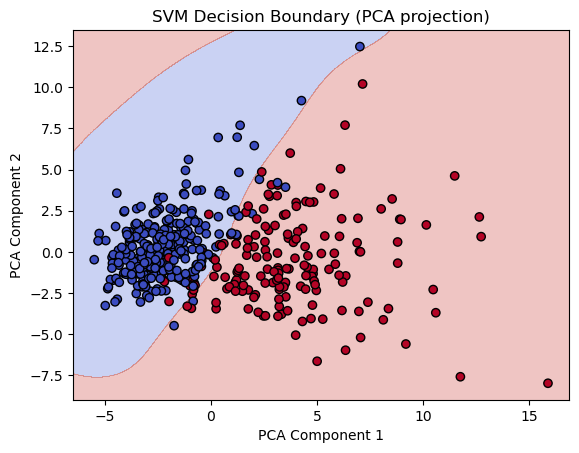


Best Parameters: {'C': 1, 'gamma': 'scale'}
Best CV Score: 0.9736263736263737

Cross-Validation Scores: [0.96703297 1.         0.96703297 0.95604396 0.97802198]
Mean CV Accuracy: 0.9736263736263737

Test Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [9]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# 2. Load dataset
df = pd.read_csv("breast-cancer.csv")
print(df.head())
print(df.info())

# Assuming target column is 'diagnosis' (M=malignant, B=benign)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Encode: M=1, B=0

target_col = 'diagnosis'
X = df.drop(target_col, axis=1)
y = df[target_col]

if y.dtype == 'object':
    y = y.map({'M': 1, 'B': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# 5. Train SVM with Linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
print("\nLinear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))

# 6. Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("\nRBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

# 7. Visualize decision boundary using PCA (2D projection)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_train_pca, y_train)

def plot_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('SVM Decision Boundary (PCA projection)')
    plt.show()

plot_decision_boundary(svm_vis, X_train_pca, y_train)

# 8. Hyperparameter tuning (C and gamma for RBF)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print("\nBest Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# 9. Cross-validation for final model
final_model = grid.best_estimator_
cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# 10. Final evaluation
y_pred_final = final_model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))
